# Produce the results and figures

AGU's figure guidelines state:

Figure sizes should be between 95 x 115 mm for quarter page to 190 x 230 mm for full page. https://www.agu.org/Publish-with-AGU/Publish/Author-Resources/Graphic-Requirements

## Import required modules

In [20]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as pl
import glob
from scipy.io.idl import readsav
from scipy.stats import linregress

## Set up plotting defaults

In [2]:
pl.rcParams['font.size'] = 9
pl.rcParams['font.family'] = 'Arial'
pl.rcParams['xtick.direction'] = 'out'
pl.rcParams['xtick.minor.visible'] = True
pl.rcParams['ytick.minor.visible'] = True
pl.rcParams['ytick.right'] = True
pl.rcParams['xtick.top'] = True

In [3]:
colors = {
    'cmip5': '#cc2323',
    'cmip6': '#2551cc',
}

In [4]:
with open('../data_output/branch_points.json', 'r') as f:
    branch_points = json.load(f)

In [5]:
models = list(branch_points['historical'].keys())
models

['ACCESS-CM2',
 'ACCESS-ESM1-5',
 'AWI-CM-1-1-MR',
 'CAMS-CSM1-0',
 'CanESM5',
 'CESM2',
 'CESM2-FV2',
 'CESM2-WACCM',
 'CESM2-WACCM-FV2',
 'CIESM',
 'CMCC-CM2-SR5',
 'CMCC-ESM2',
 'CNRM-CM6-1',
 'CNRM-ESM2-1',
 'EC-Earth3',
 'EC-Earth3-AerChem',
 'FGOALS-g3',
 'GFDL-CM4',
 'GFDL-ESM4',
 'GISS-E2-1-G',
 'HadGEM3-GC31-LL',
 'HadGEM3-GC31-MM',
 'IPSL-CM6A-LR',
 'INM-CM4-8',
 'INM-CM5-0',
 'MIROC6',
 'MIROC-ES2L',
 'MPI-ESM-1-2-HAM',
 'MPI-ESM1-2-HR',
 'MRI-ESM2-0',
 'NorESM2-LM',
 'NorESM2-MM',
 'TaiESM1',
 'UKESM1-0-LL']

In [6]:
piControls = {
    'ACCESS-CM2': 'r1i1p1f1',
    'ACCESS-ESM1-5': 'r1i1p1f1',
    'AWI-CM-1-1-MR': 'r1i1p1f1',
    'CAMS-CSM1-0': 'r1i1p1f1',
    'CanESM5': 'r1i1p1f1',
    'CESM2': 'r1i1p1f1',
    'CESM2-FV2': 'r1i1p1f1',
    'CESM2-WACCM': 'r1i1p1f1',
    'CESM2-WACCM-FV2': 'r1i1p1f1',
    'CIESM': 'r1i1p1f1',
    'CMCC-CM2-SR5': 'r1i1p1f1',
    'CMCC-ESM2': 'r1i1p1f1',
    'CNRM-CM6-1': 'r1i1p1f2',
    'CNRM-ESM2-1': 'r1i1p1f2',
    'E3SM-1-0': 'r1i1p1f1',
    'EC-Earth3': 'r1i1p1f1',
    'EC-Earth3-AerChem': 'r1i1p1f1',
    'FGOALS-g3': 'r1i1p1f1',
    'GFDL-CM4': 'r1i1p1f1',
    'GFDL-ESM4': 'r1i1p1f1',
    'GISS-E2-1-G': 'r1i1p1f2',
    'HadGEM3-GC31-LL': 'r1i1p1f1',
    'HadGEM3-GC31-MM': 'r1i1p1f1',
    'INM-CM4-8': 'r1i1p1f1',
    'INM-CM5-0': 'r1i1p1f1',
    'IPSL-CM5A2-INCA': 'r1i1p1f1',
    'IPSL-CM6A-LR': 'r1i1p1f1',
    'KACE-1-0-G': 'r1i1p1f1',
    'MIROC6': 'r1i1p1f1',
    'MIROC-ES2L': 'r1i1p1f2',
    'MPI-ESM-1-2-HAM': 'r1i1p1f1',
    'MPI-ESM1-2-HR': 'r1i1p1f1',
    'MRI-ESM2-0': 'r1i1p1f1',
    'NorESM2-LM': 'r1i1p1f1',
    'NorESM2-MM': 'r1i1p1f1',
    'TaiESM1': 'r1i1p1f1',
    'UKESM1-0-LL': 'r1i1p1f2',
}

In [7]:
with open('../data_input/cmip56_forcing_feedback_ecs.json', 'rb') as f:
    feedbacks = json.load(f)

In [8]:
lambda5 = {}
for model in feedbacks['CMIP5']:
    lambda5[model] = feedbacks['CMIP5'][model]['r1i1p1']['NET']
    
lambda6 = {}
for model in feedbacks['CMIP6']:
    if model not in piControls:
        continue
    fourtimes_run = piControls[model]
    if model=='EC-Earth3':  # no, I don't know why either
        fourtimes_run = 'r8i1p1f1'
    elif model=='GISS-E2-1-G':
        fourtimes_run = 'r1i1p1f1'
    elif model in ['HadGEM3-GC31-LL', 'HadGEM3-GC31-MM']:
        fourtimes_run = 'r1i1p1f3'
    lambda6[model] = feedbacks['CMIP6'][model][fourtimes_run]['NET']

In [9]:
piControl = {}
experiments = {}

In [10]:
for model in models:
    piControl[model] = pd.read_csv('../data_output/cmip6/%s/%s/piControl.csv' % (model, piControls[model]))
piControl['CanESM5-cmip5'] = pd.read_csv('../data_output/cmip6/CanESM5/r1i1p1f1/piControl-cmip5.csv')

In [11]:
piControl['CanESM5']

time        rsdt        rsut        rlut         tas
0    5201-07-02 12:00:00  340.231167   99.972017  240.145729  286.798785
1    5202-07-02 12:00:00  340.231167   99.927512  240.206596  286.759701
2    5203-07-02 12:00:00  340.231167   99.786571  240.251734  286.771068
3    5204-07-02 12:00:00  340.231167  100.020603  240.117629  286.686446
4    5205-07-02 12:00:00  340.231167  100.178204  240.185571  286.745928
..                   ...         ...         ...         ...         ...
995  6196-07-02 12:00:00  340.231167  100.478543  239.740398  286.440894
996  6197-07-02 12:00:00  340.231167   99.981639  239.729609  286.604358
997  6198-07-02 12:00:00  340.231167  100.547863  239.678187  286.454663
998  6199-07-02 12:00:00  340.231167  100.135244  239.706799  286.482353
999  6200-07-02 12:00:00  340.231167  100.280562  239.912627  286.543559

[1000 rows x 5 columns]

In [12]:
piControl['CanESM5-cmip5']

time        rsdt        rsut        rlut         tas
0    5201-07-02 12:00:00  340.231167   99.564199  240.491248  286.846078
1    5202-07-02 12:00:00  340.231167   99.690000  240.624373  286.898486
2    5203-07-02 12:00:00  340.231167  100.049786  240.467051  286.710395
3    5204-07-02 12:00:00  340.231167   99.187950  240.542692  286.773520
4    5205-07-02 12:00:00  340.231167   99.371571  240.340051  286.834138
..                   ...         ...         ...         ...         ...
395  5596-07-02 12:00:00  340.231167   99.666890  240.484796  286.808317
396  5597-07-02 12:00:00  340.231167   99.724193  240.486931  286.782233
397  5598-07-02 12:00:00  340.231167   99.515078  240.355637  286.724666
398  5599-07-02 12:00:00  340.231167   99.547610  240.563797  286.855599
399  5600-07-02 12:00:00  340.231167   99.939925  240.536510  286.825775

[400 rows x 5 columns]

In [13]:
delta_N = {}
delta_T = {}
delta_F = {}

for experiment in ['historical', 'hist-GHG', 'hist-nat', 'hist-aer', 'historical-cmip5', 'hist-GHG-cmip5', 'hist-nat-cmip5', 'hist-aer-cmip5']:
    if experiment[-5:] == 'cmip5':
        nyears = 156
    else:
        nyears = 165
    delta_N[experiment] = {}
    delta_T[experiment] = {}
    delta_F[experiment] = {}
    for model in branch_points[experiment].keys():
        delta_N[experiment][model] = {}
        delta_T[experiment][model] = {}
        delta_F[experiment][model] = {}
        for run in list(branch_points[experiment][model].keys()):
            data = pd.read_csv('../data_output/cmip6/%s/%s/%s.csv' % (model, run, experiment))
            index_start = branch_points[experiment][model][run]
            N_historical = data['rsdt'].values[:nyears] - data['rsut'].values[:nyears] - data['rlut'].values[:nyears]
            if experiment[-5:] == 'cmip5':
                piC = piControl['CanESM5-cmip5']
            else:
                piC = piControl[model]
            N_piControl = (
                piC['rsdt'][index_start:index_start+nyears].values - 
                piC['rsut'][index_start:index_start+nyears].values - 
                piC['rlut'][index_start:index_start+nyears].values
            )
            delta_N[experiment][model][run] = N_historical - N_piControl
            delta_T[experiment][model][run] = data['tas'].values[:nyears] - piC['tas'][index_start:index_start+nyears].values
            delta_F[experiment][model][run] = delta_N[experiment][model][run] - lambda6[model] * delta_T[experiment][model][run]
        delta_F_array = np.ones((nyears, len(branch_points[experiment][model]))) * np.nan
        delta_N_array = np.ones((nyears, len(branch_points[experiment][model]))) * np.nan
        delta_T_array = np.ones((nyears, len(branch_points[experiment][model]))) * np.nan
        for i, run in enumerate(branch_points[experiment][model].keys()):
            delta_F_array[:, i] = delta_F[experiment][model][run]
            delta_N_array[:, i] = delta_N[experiment][model][run]
            delta_T_array[:, i] = delta_T[experiment][model][run]
        delta_F[experiment][model]['mean'] = np.mean(delta_F_array, axis=1)
        delta_N[experiment][model]['mean'] = np.mean(delta_N_array, axis=1)
        delta_T[experiment][model]['mean'] = np.mean(delta_T_array, axis=1)
        
        
delta_N['hist-otheranthro'] = {}
delta_T['hist-otheranthro'] = {}
delta_F['hist-otheranthro'] = {}
for model in branch_points['historical'].keys():
    if (model not in branch_points['hist-nat'].keys()) and (model not in branch_points['hist-GHG'].keys()):
        continue
    print(model)
    if (model in branch_points['hist-aer'].keys()):
        print(model)
    delta_N['hist-otheranthro'][model] = {}
    delta_T['hist-otheranthro'][model] = {}
    delta_F['hist-otheranthro'][model] = {}
    for run in list(branch_points['historical'][model].keys()):
        if (run not in branch_points['hist-nat'][model].keys()) or (run not in branch_points['hist-GHG'][model].keys()):
            continue
        delta_N['hist-otheranthro'][model][run] = delta_N['historical'][model][run] - delta_N['hist-GHG'][model][run] - delta_N['hist-nat'][model][run]
        delta_T['hist-otheranthro'][model][run] = delta_T['historical'][model][run] - delta_T['hist-GHG'][model][run] - delta_T['hist-nat'][model][run]
        delta_F['hist-otheranthro'][model][run] = delta_F['historical'][model][run] - delta_F['hist-GHG'][model][run] - delta_F['hist-nat'][model][run]
    delta_F_array = np.ones((165, len(delta_F['hist-otheranthro'][model]))) * np.nan
    delta_N_array = np.ones((165, len(delta_N['hist-otheranthro'][model]))) * np.nan
    delta_T_array = np.ones((165, len(delta_T['hist-otheranthro'][model]))) * np.nan
    for i, run in enumerate(delta_T['hist-otheranthro'][model].keys()):
        delta_F_array[:, i] = delta_F['hist-otheranthro'][model][run]
        delta_N_array[:, i] = delta_N['hist-otheranthro'][model][run]
        delta_T_array[:, i] = delta_T['hist-otheranthro'][model][run]
    delta_F['hist-otheranthro'][model]['mean'] = np.mean(delta_F_array, axis=1)
    delta_N['hist-otheranthro'][model]['mean'] = np.mean(delta_N_array, axis=1)
    delta_T['hist-otheranthro'][model]['mean'] = np.mean(delta_T_array, axis=1)

delta_N['hist-otheranthro-cmip5'] = {}
delta_T['hist-otheranthro-cmip5'] = {}
delta_F['hist-otheranthro-cmip5'] = {}
for model in branch_points['historical-cmip5'].keys():
    if (model not in branch_points['hist-nat-cmip5'].keys()) and (model not in branch_points['hist-GHG-cmip5'].keys()):
        continue
    delta_N['hist-otheranthro-cmip5'][model] = {}
    delta_T['hist-otheranthro-cmip5'][model] = {}
    delta_F['hist-otheranthro-cmip5'][model] = {}
    for run in list(branch_points['historical-cmip5'][model].keys()):
        if (run not in branch_points['hist-nat-cmip5'][model].keys()) or (run not in branch_points['hist-GHG-cmip5'][model].keys()):
            continue
        delta_N['hist-otheranthro-cmip5'][model][run] = delta_N['historical-cmip5'][model][run] - delta_N['hist-GHG-cmip5'][model][run] - delta_N['hist-nat-cmip5'][model][run]
        delta_T['hist-otheranthro-cmip5'][model][run] = delta_T['historical-cmip5'][model][run] - delta_T['hist-GHG-cmip5'][model][run] - delta_T['hist-nat-cmip5'][model][run]
        delta_F['hist-otheranthro-cmip5'][model][run] = delta_F['historical-cmip5'][model][run] - delta_F['hist-GHG-cmip5'][model][run] - delta_F['hist-nat-cmip5'][model][run]
    delta_F_array = np.ones((156, len(delta_F['hist-otheranthro-cmip5'][model]))) * np.nan
    delta_N_array = np.ones((156, len(delta_N['hist-otheranthro-cmip5'][model]))) * np.nan
    delta_T_array = np.ones((156, len(delta_T['hist-otheranthro-cmip5'][model]))) * np.nan
    for i, run in enumerate(delta_T['hist-otheranthro-cmip5'][model].keys()):
        delta_F_array[:, i] = delta_F['hist-otheranthro-cmip5'][model][run]
        delta_N_array[:, i] = delta_N['hist-otheranthro-cmip5'][model][run]
        delta_T_array[:, i] = delta_T['hist-otheranthro-cmip5'][model][run]
    delta_F['hist-otheranthro-cmip5'][model]['mean'] = np.mean(delta_F_array, axis=1)
    delta_N['hist-otheranthro-cmip5'][model]['mean'] = np.mean(delta_N_array, axis=1)
    delta_T['hist-otheranthro-cmip5'][model]['mean'] = np.mean(delta_T_array, axis=1)

ACCESS-CM2
ACCESS-CM2
ACCESS-ESM1-5
ACCESS-ESM1-5
CanESM5
CanESM5
CESM2
CESM2
CNRM-CM6-1
CNRM-CM6-1
FGOALS-g3
FGOALS-g3
GFDL-ESM4
GFDL-ESM4
GISS-E2-1-G
GISS-E2-1-G
HadGEM3-GC31-LL
HadGEM3-GC31-LL
IPSL-CM6A-LR
IPSL-CM6A-LR
MIROC6
MIROC6
MRI-ESM2-0
MRI-ESM2-0
NorESM2-LM
NorESM2-LM


In [14]:
delta_F['hist-GHG']['MIROC6'].keys()

dict_keys(['r1i1p1f1', 'r3i1p1f1', 'r2i1p1f1', 'mean'])

In [15]:
run = 'r2i1p2f1'
model = 'CanESM5'
for run in list(branch_points['historical'][model].keys()):
    print (run, run not in branch_points['hist-nat'][model].keys()) and (run not in branch_points['hist-GHG'][model].keys())


r1i1p1f1 False
r12i1p1f1 False
r13i1p1f1 False
r3i1p1f1 False
r14i1p1f1 False
r4i1p1f1 False
r17i1p1f1 False
r7i1p1f1 False
r11i1p1f1 False
r5i1p1f1 False
r9i1p1f1 False
r6i1p1f1 False
r15i1p1f1 False
r10i1p1f1 False
r2i1p1f1 False
r8i1p1f1 False
r16i1p1f1 False


In [16]:
# grab the forcing, which was produced by me from RFMIP models in another project!
rfmip_erf = pd.read_csv('../data_input/RFMIP-ERF-tier2.csv')

### Correlation between implied ERF and RFMIP ERF

Reviewer 2 wanted to see this. All models will be highly correlated - it might be best to look at the slopes and those models that are closer to 1:1 are better

CanESM5 0.8663244200846476 0.9706147766260358
CNRM-CM6-1 0.8744891580121321 0.9311359798127533
GFDL-CM4 0.6837403119196761 0.7753918699750394
GISS-E2-1-G 0.9589488161519317 0.944483868343094
HadGEM3-GC31-LL 0.849484875524881 0.9349607391870907
IPSL-CM6A-LR 0.7783392991027651 0.9782359681559645
MIROC6 0.9241011838336259 0.9727248530200624
NorESM2-LM 0.649831779489493 0.6224557944536891


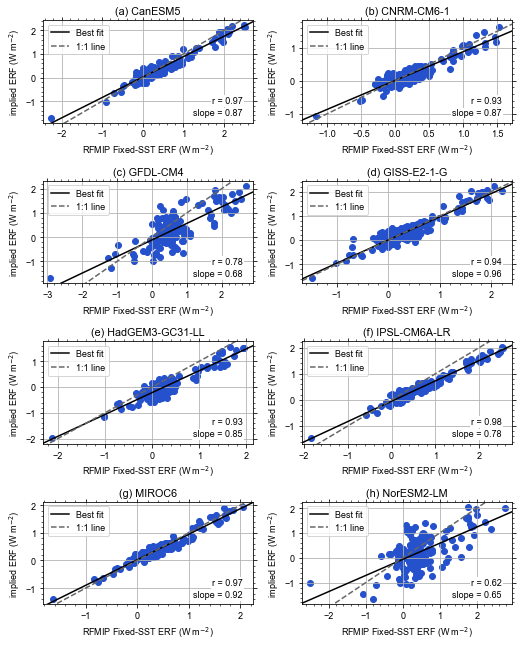

In [45]:
models_rfmip = ['CanESM5', 'CNRM-CM6-1', 'GFDL-CM4', 'GISS-E2-1-G', 'HadGEM3-GC31-LL', 'IPSL-CM6A-LR', 'MIROC6', 'NorESM2-LM']
fig, ax = pl.subplots(4, 2, figsize=(19/2.54, 23/2.54))
for i, model in enumerate(models_rfmip):
    col = i%2
    row = i//2
    if '%s TOT' % model in rfmip_erf:
        ax[row,col].scatter(rfmip_erf['%s TOT' % model].values[:165], delta_F['historical'][model]['mean'], color=colors['cmip6'])
    ax[row,col].set_title('(%s) %s' % (chr(97+i), model))
    ax[row,col].set_xlabel('RFMIP Fixed-SST ERF (W m$^{-2}$)')
    ax[row,col].set_ylabel('implied ERF (W m$^{-2}$)')
    ax[row,col].grid()
    regress = linregress(rfmip_erf['%s TOT' % model].values[:165], delta_F['historical'][model]['mean'])
    print(model, regress.slope, regress.rvalue)
    x_min = np.min(rfmip_erf['%s TOT' % model].values[:165])
    x_max = np.max(rfmip_erf['%s TOT' % model].values[:165])
    y_min = np.min(delta_F['historical'][model]['mean'])
    y_max = np.max(delta_F['historical'][model]['mean'])
    
    # plot regression slope
    ax[row,col].plot(np.linspace(x_min-0.2, x_max+0.2), regress.slope*np.linspace(x_min-0.2, x_max+0.2)+regress.intercept, color='k', label='Best fit')
    
    # plot 1:1 line
    ax[row,col].plot(np.linspace(x_min-0.2, x_max+0.2), np.linspace(x_min-0.2, x_max+0.2), color='0.4', ls='--', label='1:1 line')
    
    # axis bounds
    ax[row,col].set_xlim(x_min-0.2, x_max+0.2)
    ax[row,col].set_ylim(y_min-0.2, y_max+0.2)
    
    ax[row,col].legend()
    ax[row,col].text(0.95,0.05,'slope = %.2f' % regress.slope, ha='right', va='bottom', transform=ax[row,col].transAxes, backgroundcolor='w', bbox=dict(boxstyle='square,pad=0.1',ec='w',fc='w'))
    ax[row,col].text(0.95,0.17,'r = %.2f' % regress.rvalue, ha='right', va='bottom', transform=ax[row,col].transAxes, backgroundcolor='w', bbox=dict(boxstyle='square,pad=0.1',ec='w',fc='w'))
    
#pl.figtext(0.01, 0.5, 'Historical effective radiative forcing (W m$^{-2}$)', rotation=90, va='center')
#ax[0,0].legend(loc='upper left', bbox_to_anchor=[0, -2.4], ncol=3)
fig.tight_layout(rect=[0.02, 0, 1, 1])

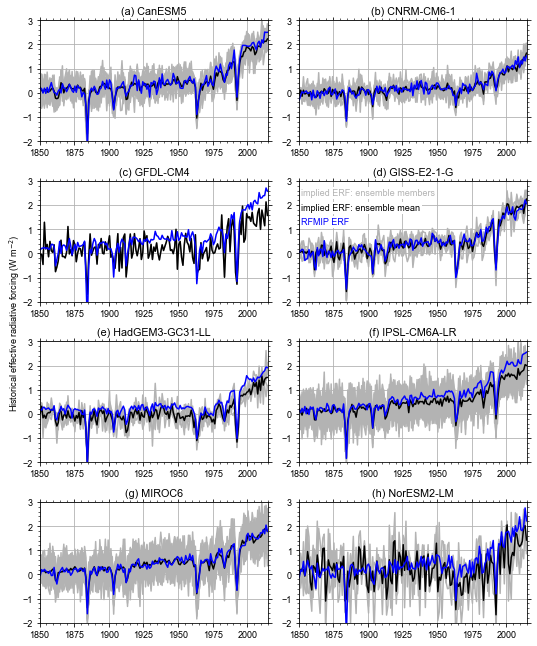

In [17]:
fig, ax = pl.subplots(4, 2, figsize=(19/2.54, 23/2.54))
for i, model in enumerate(models_rfmip):
    col = i%2
    row = i//2
    for run in branch_points['historical'][model].keys():
        if model=='CanESM5' and run=='r1i1p1f1':
            label='implied ERF ensemble members'
        else:
            label=''
        ax[row,col].plot(np.arange(1850.5, 2015), delta_F['historical'][model][run], color='0.7', label=label)
    ax[row,col].plot(np.arange(1850.5, 2015), delta_F['historical'][model]['mean'], color='k', label='implied ERF ensemble mean')
    ax[row,col].set_title('(%s) %s' % (chr(97+i), model))
    if '%s TOT' % model in rfmip_erf:
        ax[row,col].plot(np.arange(1850.5, 2015), rfmip_erf['%s TOT' % model].values[:165], color=colors['cmip6'], label='RFMIP ERF')
    ax[row,col].set_xlim(1850, 2015)
    ax[row,col].set_ylim(-2, 3)
    ax[row,col].grid()
pl.figtext(0.01, 0.5, 'Historical effective radiative forcing (W m$^{-2}$)', rotation=90, va='center')
#ax[0,0].legend(loc='upper left', bbox_to_anchor=[0, -2.4], ncol=3)
ax[1,1].text(0.01, 0.88, 'implied ERF: ensemble members', transform=ax[1,1].transAxes, color='0.7', backgroundcolor='w', bbox=dict(boxstyle='square,pad=0.1',ec='w',fc='w'))
ax[1,1].text(0.01, 0.76, 'implied ERF: ensemble mean', transform=ax[1,1].transAxes, backgroundcolor='w', bbox=dict(boxstyle='square,pad=0.1',ec='w',fc='w'))
ax[1,1].text(0.01, 0.64, 'RFMIP ERF', transform=ax[1,1].transAxes, color='b', backgroundcolor='w', bbox=dict(boxstyle='square,pad=0.1',ec='w',fc='w'))
fig.tight_layout(rect=[0.02, 0, 1, 1])
pl.savefig('../plots/fig1.pdf')

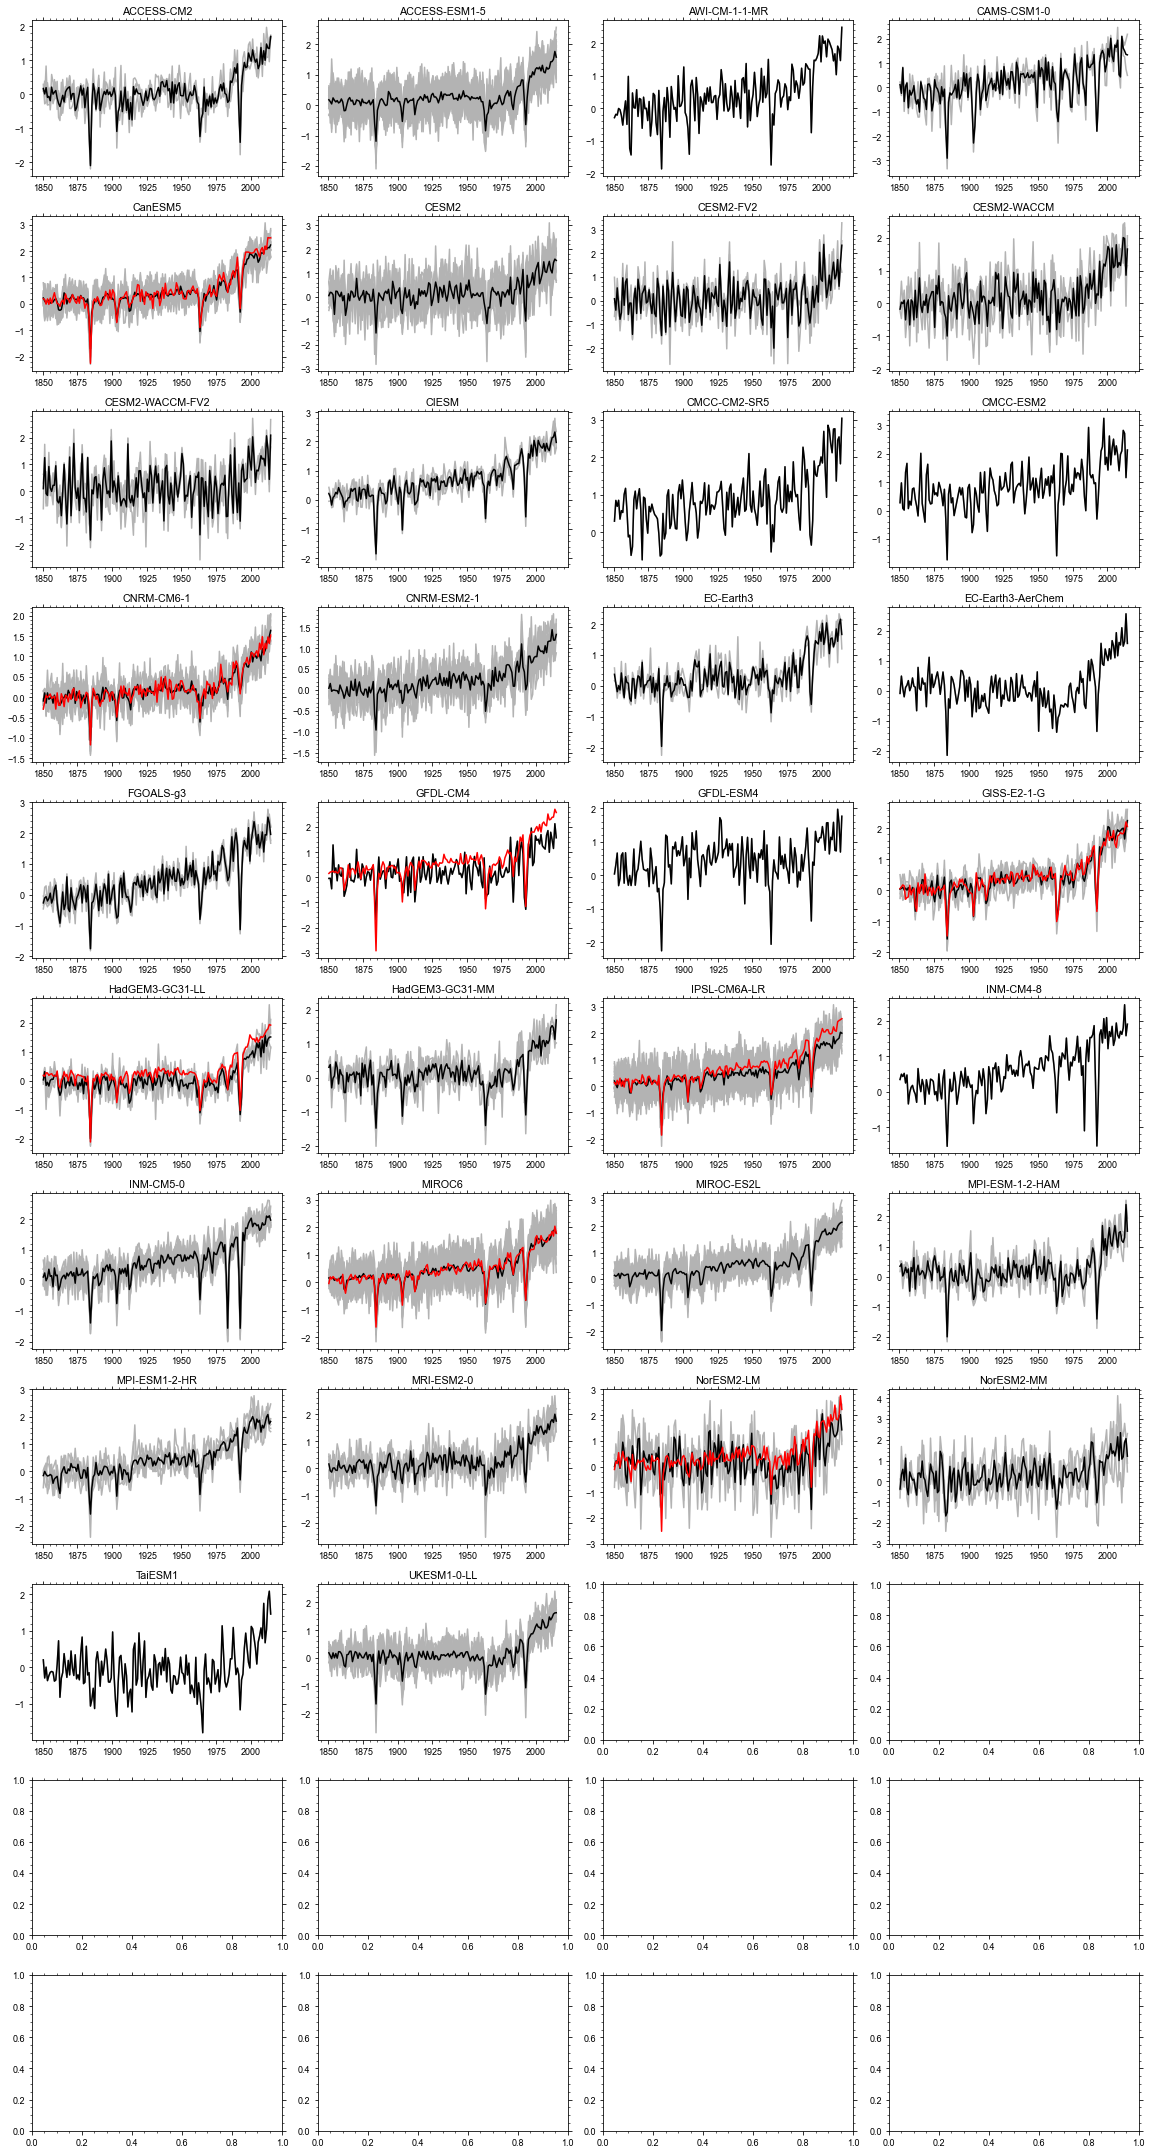

In [18]:
fig, ax = pl.subplots(11, 4, figsize=(16,30))

for i, model in enumerate(models):
    col = i%4
    row = i//4
    for run in branch_points['historical'][model].keys():
        ax[row,col].plot(np.arange(1850.5, 2015), delta_F['historical'][model][run], color='0.7')
    ax[row,col].plot(np.arange(1850.5, 2015), delta_F['historical'][model]['mean'], color='k')
    ax[row,col].set_title(model)
    if '%s TOT' % model in rfmip_erf:
        ax[row,col].plot(np.arange(1850.5, 2015), rfmip_erf['%s TOT' % model].values[:165], color='r')
fig.tight_layout()

(1850.0, 2015.0)

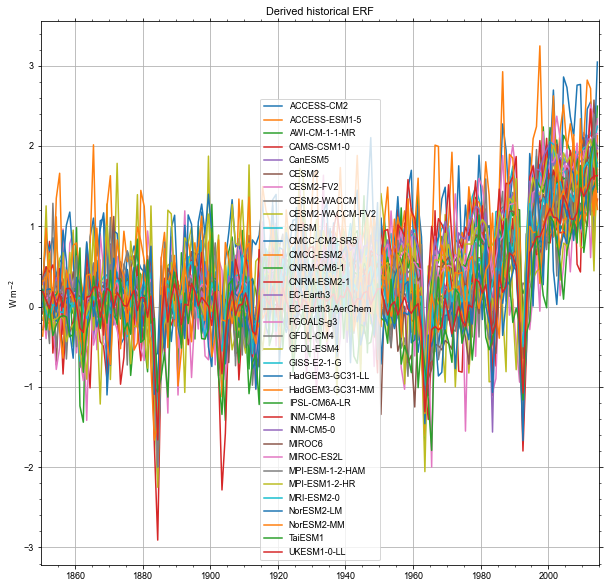

In [19]:
fig, ax = pl.subplots(figsize=(10,10))
for model in models:
    ax.plot(np.arange(1850.5, 2015), delta_F['historical'][model]['mean'], label=model)
ax.legend()
ax.grid()
ax.set_ylabel('W m$^{-2}$');
ax.set_title('Derived historical ERF')
ax.set_xlim(1850,2015)
# compare 2014 with Smith et al

(1850.0, 2015.0)

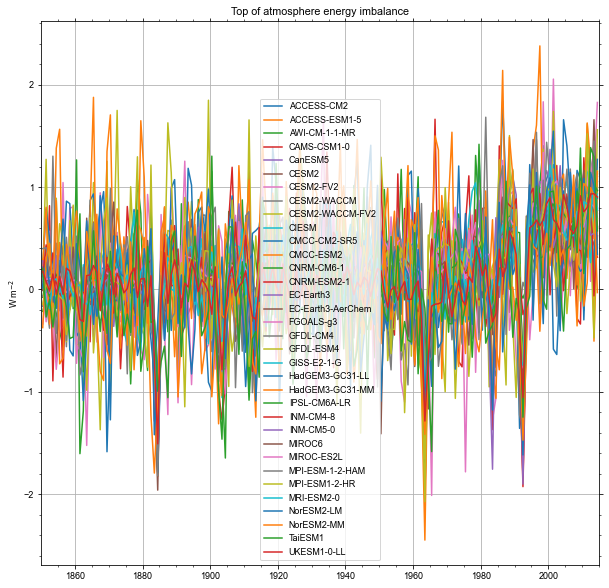

In [20]:
fig, ax = pl.subplots(figsize=(10,10))
for model in models:
    ax.plot(np.arange(1850.5, 2015), delta_N['historical'][model]['mean'], label=model)
ax.legend()
ax.grid()
ax.set_ylabel('W m$^{-2}$');
ax.set_title('Top of atmosphere energy imbalance')
ax.set_xlim(1850,2015)

(1850.0, 2015.0)

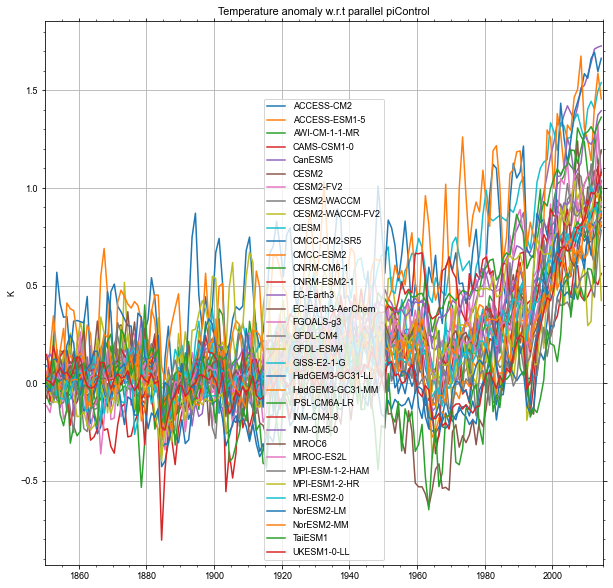

In [21]:
fig, ax = pl.subplots(figsize=(10,10))
for model in models:
    ax.plot(np.arange(1850.5, 2015), delta_T['historical'][model]['mean'], label=model)
ax.legend()
ax.grid()
pl.ylabel('K');
pl.title('Temperature anomaly w.r.t parallel piControl')
ax.set_xlim(1850,2015)

In [22]:
delta_F_cmip6_consolidated = {}
delta_N_cmip6_consolidated = {}
delta_T_cmip6_consolidated = {}
for experiment in ['historical', 'hist-nat', 'hist-GHG', 'hist-aer', 'hist-otheranthro']:
    delta_F_cmip6_consolidated[experiment] = np.zeros((165, len(delta_F[experiment])))
    delta_T_cmip6_consolidated[experiment] = np.zeros((165, len(delta_T[experiment])))
    delta_N_cmip6_consolidated[experiment] = np.zeros((165, len(delta_N[experiment])))
    for i, model in enumerate(delta_T[experiment].keys()):
        delta_F_cmip6_consolidated[experiment][:,i] = delta_F[experiment][model]['mean']
        delta_N_cmip6_consolidated[experiment][:,i] = delta_N[experiment][model]['mean']
        delta_T_cmip6_consolidated[experiment][:,i] = delta_T[experiment][model]['mean']

In [23]:
delta_F['historical-cmip5']['CanESM5']

{'r1i1p1f1': array([ 0.08086275,  0.1815873 , -0.07326008, -0.6642718 ,  0.09427836,
         0.57810818, -0.96881502, -1.52820251, -0.36583741,  0.75193036,
         0.06338547,  0.06555369, -1.07003296,  0.13842605, -0.45041084,
        -0.17938568, -0.5176244 , -0.35264628,  0.40240912, -0.2282651 ,
        -0.33768283,  0.07832318,  0.62546837, -0.16503829, -0.28183194,
        -0.23647341,  0.21020849, -0.10764347, -0.71911649, -0.03079124,
         0.47458194, -0.40389786,  0.18029015,  0.32141975, -1.89458957,
        -2.46760153, -1.19219807,  0.16352846, -0.33380082, -0.35890773,
        -0.6539142 , -0.24243471, -0.41580714,  0.36791407,  0.56114285,
         0.05185105, -0.47035437,  0.18021196,  0.50959625,  0.22791012,
         0.29435385, -0.37155008,  0.04199021, -1.0441907 , -0.29576443,
         0.12491666, -0.27179125, -0.16109814, -0.30273314,  0.20201151,
        -0.3855245 ,  0.28696016, -0.48467006, -0.35656141,  0.13671247,
        -0.05927111, -0.084955  , -0.16

In [24]:
# cmip5_df = pd.read_csv('../data_input/Forster2013_forcings_5yrsmooth_and_nosmooth.csv', skiprows=3, index_col=0, skipfooter=36)
# cmip5_df[cmip5_df==-99.99] = np.nan
# cmip5_df
# cmip5_df.mean(axis=1)

In [25]:
hadcrut5 = pd.read_csv('../data_input/HadCRUT.5.0.1.0.analysis.summary_series.global.annual.csv', index_col=0)
hadcrut5.loc[:2020, 'Anomaly (deg C)'] - hadcrut5.loc[1850:1900,'Anomaly (deg C)'].mean()

Time
1850   -0.061157
1851    0.123152
1852    0.127103
1853    0.086148
1854    0.064872
          ...   
2016    1.289429
2017    1.201676
2018    1.119156
2019    1.247575
2020    1.279296
Name: Anomaly (deg C), Length: 171, dtype: float64

In [26]:
glob.glob('../data_input/cmip5_Forster_etal_2013/*')

['../data_input/cmip5_Forster_etal_2013/rlut_ACCESS1-0_historical_r1i1p1.idlsave',
 '../data_input/cmip5_Forster_etal_2013/rlut_ACCESS1-3_historical_r1i1p1.idlsave',
 '../data_input/cmip5_Forster_etal_2013/rlut_bcc-csm1-1_historicalGHG_r1i1p1.idlsave',
 '../data_input/cmip5_Forster_etal_2013/rlut_bcc-csm1-1_historicalNat_r1i1p1.idlsave',
 '../data_input/cmip5_Forster_etal_2013/rlut_bcc-csm1-1_historical_r1i1p1.idlsave',
 '../data_input/cmip5_Forster_etal_2013/rlut_bcc-csm1-1_historical_r2i1p1.idlsave',
 '../data_input/cmip5_Forster_etal_2013/rlut_bcc-csm1-1_historical_r3i1p1.idlsave',
 '../data_input/cmip5_Forster_etal_2013/rlut_bcc-csm1-1-m_historical_r1i1p1.idlsave',
 '../data_input/cmip5_Forster_etal_2013/rlut_bcc-csm1-1-m_historical_r2i1p1.idlsave',
 '../data_input/cmip5_Forster_etal_2013/rlut_bcc-csm1-1-m_historical_r3i1p1.idlsave',
 '../data_input/cmip5_Forster_etal_2013/rlut_CanESM2_historicalGHG_r1i1p1.idlsave',
 '../data_input/cmip5_Forster_etal_2013/rlut_CanESM2_historicalGHG

In [27]:
delta_N_cmip5 = {}
delta_T_cmip5 = {}
delta_F_cmip5 = {}

models = {}

for experiment in ['historical', 'historicalNat', 'historicalGHG']:
    delta_N_cmip5[experiment] = {}
    delta_T_cmip5[experiment] = {}
    delta_F_cmip5[experiment] = {}
    models[experiment] = set()
    for variable in ['rsdt', 'rsut', 'rlut', 'tas']:
        file_list = (glob.glob('../data_input/cmip5_Forster_etal_2013/%s_*_%s_*.idlsave' % (variable, experiment)))
        for file in file_list:
            models[experiment].add(file.split('_')[5])
    models[experiment] = (list(models[experiment]))
    for model in models[experiment]:
        if model not in lambda5:
            continue
        if model=='CCSM4':
            continue  # it's sick
        delta_N_cmip5[experiment][model] = {}
        delta_T_cmip5[experiment][model] = {}
        delta_F_cmip5[experiment][model] = {}
        file_list = glob.glob('../data_input/cmip5_Forster_etal_2013/rsdt_%s_%s_*.idlsave' % (model, experiment))
        for rsdtfile in file_list:
            run = rsdtfile.split('_')[7][:-8]
            tasfile = rsdtfile.replace('rsdt', 'tas')
            rsutfile = rsdtfile.replace('rsdt', 'rsut')
            rlutfile = rsdtfile.replace('rsdt', 'rlut')
                   
            try:
                tasdata = readsav(tasfile)
                len_tas = len(tasdata['tas'])
                rsdtdata = readsav(rsdtfile)
                len_rsdt = len(rsdtdata['rsdt'])
                rsutdata = readsav(rsutfile)
                len_rsut = len(rsutdata['rsut'])
                rlutdata = readsav(rlutfile)
                len_rlut = len(rlutdata['rlut'])
                tasdata['tas']-tasdata['ctrl'][:len_tas]
                rsdtdata['rsdt']-rsdtdata['ctrl'][:len_tas]
                rsutdata['rsut']-rsutdata['ctrl'][:len_tas]
                rlutdata['rlut']-rlutdata['ctrl'][:len_tas]
            except:
                continue
            
            delta_T_cmip5[experiment][model][run] = np.ones(156) * np.nan
            delta_N_cmip5[experiment][model][run] = np.ones(156) * np.nan
            delta_F_cmip5[experiment][model][run] = np.ones(156) * np.nan
            
            first_time = tasdata['time'][0]
            first_index = int(first_time - 1850)
            if model[:3] == 'Had':
                offset=-11
                first_index = first_index+1
            else:
                offset=0
            print(model, experiment, run, first_time, first_index)
            for i in range(first_index, 156):
                delta_T_cmip5[experiment][model][run][i] = np.mean(tasdata['tas'][(i-first_index)*12+offset:12+(i-first_index)*12+offset]) - np.mean(tasdata['ctrl'][(i-first_index)*12+offset:12+(i-first_index)*12+offset])
                rsdt = np.mean(rsdtdata['rsdt'][(i-first_index)*12+offset:12+(i-first_index)*12+offset]) - np.mean(rsdtdata['ctrl'][(i-first_index)*12+offset:12+(i-first_index)*12+offset])
                rsut = np.mean(rsutdata['rsut'][(i-first_index)*12+offset:12+(i-first_index)*12+offset]) - np.mean(rsutdata['ctrl'][(i-first_index)*12+offset:12+(i-first_index)*12+offset])
                rlut = np.mean(rlutdata['rlut'][(i-first_index)*12+offset:12+(i-first_index)*12+offset]) - np.mean(rlutdata['ctrl'][(i-first_index)*12+offset:12+(i-first_index)*12+offset])
                delta_N_cmip5[experiment][model][run][i] = rsdt - rsut - rlut
            delta_F_cmip5[experiment][model][run] = delta_N_cmip5[experiment][model][run] - lambda5[model] * delta_T_cmip5[experiment][model][run]
        delta_F_array = np.ones((nyears, len(delta_F_cmip5[experiment][model]))) * np.nan
        delta_N_array = np.ones((nyears, len(delta_N_cmip5[experiment][model]))) * np.nan
        delta_T_array = np.ones((nyears, len(delta_T_cmip5[experiment][model]))) * np.nan
        for i, run in enumerate(delta_F_cmip5[experiment][model].keys()):
            delta_F_array[:, i] = delta_F_cmip5[experiment][model][run]
            delta_N_array[:, i] = delta_N_cmip5[experiment][model][run]
            delta_T_array[:, i] = delta_T_cmip5[experiment][model][run]
        delta_F_cmip5[experiment][model]['mean'] = np.nanmean(delta_F_array, axis=1)
        delta_N_cmip5[experiment][model]['mean'] = np.nanmean(delta_N_array, axis=1)
        delta_T_cmip5[experiment][model]['mean'] = np.nanmean(delta_T_array, axis=1)

delta_N_cmip5['historicalOther'] = {}
delta_T_cmip5['historicalOther'] = {}
delta_F_cmip5['historicalOther'] = {}
for model in delta_T_cmip5['historical'].keys():
    if (model not in delta_T_cmip5['historicalNat'].keys()) and (model not in delta_T_cmip5['historicalGHG'].keys()):
        continue
    print(model)
    delta_N_cmip5['historicalOther'][model] = {}
    delta_T_cmip5['historicalOther'][model] = {}
    delta_F_cmip5['historicalOther'][model] = {}
    for run in list(delta_T_cmip5['historical'][model].keys()):
        if (run not in delta_T_cmip5['historicalGHG'][model].keys()) or (run not in delta_T_cmip5['historicalNat'][model].keys()):
            continue
        delta_N_cmip5['historicalOther'][model][run] = delta_N_cmip5['historical'][model][run] - delta_N_cmip5['historicalGHG'][model][run] - delta_N_cmip5['historicalNat'][model][run]
        delta_T_cmip5['historicalOther'][model][run] = delta_T_cmip5['historical'][model][run] - delta_T_cmip5['historicalGHG'][model][run] - delta_T_cmip5['historicalNat'][model][run]
        delta_F_cmip5['historicalOther'][model][run] = delta_F_cmip5['historical'][model][run] - delta_F_cmip5['historicalGHG'][model][run] - delta_F_cmip5['historicalNat'][model][run]
    delta_F_array = np.ones((156, len(delta_F_cmip5['historicalOther'][model]))) * np.nan
    delta_N_array = np.ones((156, len(delta_N_cmip5['historicalOther'][model]))) * np.nan
    delta_T_array = np.ones((156, len(delta_T_cmip5['historicalOther'][model]))) * np.nan
    for i, run in enumerate(delta_T_cmip5['historicalOther'][model].keys()):
        delta_F_array[:, i] = delta_F_cmip5['historicalOther'][model][run]
        delta_N_array[:, i] = delta_N_cmip5['historicalOther'][model][run]
        delta_T_array[:, i] = delta_T_cmip5['historicalOther'][model][run]
    delta_F_cmip5['historicalOther'][model]['mean'] = np.mean(delta_F_array, axis=1)
    delta_N_cmip5['historicalOther'][model]['mean'] = np.mean(delta_N_array, axis=1)
    delta_T_cmip5['historicalOther'][model]['mean'] = np.mean(delta_T_array, axis=1)

MPI-ESM-P historical r1i1p1 1850.0416 0
MPI-ESM-P historical r2i1p1 1850.0416 0
CanESM2 historical r1i1p1 1850.0416 0
CanESM2 historical r2i1p1 1850.0416 0
CanESM2 historical r3i1p1 1850.0416 0
CanESM2 historical r4i1p1 1850.0416 0
CanESM2 historical r5i1p1 1850.0416 0
IPSL-CM5B-LR historical r1i1p1 1850.0416 0
inmcm4 historical r1i1p1 1850.0416 0
ACCESS1-0 historical r1i1p1 1850.0416 0
FGOALS-s2 historical r1i1p1 1850.0416 0
FGOALS-s2 historical r2i1p1 1850.0416 0
FGOALS-s2 historical r3i1p1 1850.0416 0
NorESM1-M historical r1i1p1 1850.0416 0
NorESM1-M historical r2i1p1 1850.0416 0
NorESM1-M historical r3i1p1 1850.0416 0
GISS-E2-R historical r1i1p1 1850.0416 0
GISS-E2-R historical r2i1p1 1850.0416 0
GISS-E2-R historical r3i1p1 1850.0416 0
GISS-E2-R historical r4i1p1 1850.0416 0
GISS-E2-R historical r5i1p1 1850.0416 0
GISS-E2-R historical r6i1p1 1850.0416 0
IPSL-CM5A-LR historical r1i1p1 1850.0416 0
IPSL-CM5A-LR historical r2i1p1 1850.0416 0
IPSL-CM5A-LR historical r3i1p1 1850.0416 0
I

<ipython-input-27-9bfea4d15f7f>:74: RuntimeWarning: Mean of empty slice
  delta_F_cmip5[experiment][model]['mean'] = np.nanmean(delta_F_array, axis=1)
<ipython-input-27-9bfea4d15f7f>:75: RuntimeWarning: Mean of empty slice
  delta_N_cmip5[experiment][model]['mean'] = np.nanmean(delta_N_array, axis=1)
<ipython-input-27-9bfea4d15f7f>:76: RuntimeWarning: Mean of empty slice
  delta_T_cmip5[experiment][model]['mean'] = np.nanmean(delta_T_array, axis=1)


MIROC5 historical r1i1p1 1850.0416 0
MIROC5 historical r2i1p1 1850.0416 0
MIROC5 historical r3i1p1 1850.0416 0
MIROC5 historical r4i1p1 1850.0416 0
MIROC5 historical r5i1p1 1850.0416 0
MRI-CGCM3 historical r1i1p1 1850.0416 0
MRI-CGCM3 historical r2i1p1 1850.0416 0
MRI-CGCM3 historical r3i1p1 1850.0416 0
HadGEM2-ES historical r1i1p1 1859.9583 10
HadGEM2-ES historical r2i1p1 1859.9583 10
HadGEM2-ES historical r3i1p1 1859.9583 10
HadGEM2-ES historical r4i1p1 1859.9583 10
ACCESS1-3 historical r1i1p1 1850.0416 0
MPI-ESM-LR historical r1i1p1 1850.0416 0
MPI-ESM-LR historical r2i1p1 1850.0416 0
MPI-ESM-LR historical r3i1p1 1850.0416 0


/nfs/b0110/Users/mencsm/miniconda3/envs/cmip5-cmip6-forcing/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/nfs/b0110/Users/mencsm/miniconda3/envs/cmip5-cmip6-forcing/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/nfs/b0110/Users/mencsm/miniconda3/envs/cmip5-cmip6-forcing/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


IPSL-CM5A-MR historical r1i1p1 1850.0416 0
GFDL-ESM2M historical r1i1p1 1861.0416 11
MPI-ESM-MR historical r1i1p1 1850.0416 0
MPI-ESM-MR historical r2i1p1 1850.0416 0
MPI-ESM-MR historical r3i1p1 1850.0416 0
NorESM1-ME historical r1i1p1 1850.0416 0
GFDL-ESM2G historical r1i1p1 1861.0416 11
GFDL-ESM2G historical r2i1p1 1861.0416 11
CSIRO-Mk3-6-0 historical r10i1p1 1850.0416 0
CSIRO-Mk3-6-0 historical r1i1p1 1850.0416 0
CSIRO-Mk3-6-0 historical r2i1p1 1850.0416 0
CSIRO-Mk3-6-0 historical r3i1p1 1850.0416 0
CSIRO-Mk3-6-0 historical r4i1p1 1850.0416 0
CSIRO-Mk3-6-0 historical r5i1p1 1850.0416 0
CSIRO-Mk3-6-0 historical r6i1p1 1850.0416 0
CSIRO-Mk3-6-0 historical r7i1p1 1850.0416 0
CSIRO-Mk3-6-0 historical r8i1p1 1850.0416 0
CSIRO-Mk3-6-0 historical r9i1p1 1850.0416 0
bcc-csm1-1-m historical r1i1p1 1850.0416 0
bcc-csm1-1-m historical r2i1p1 1850.0416 0
bcc-csm1-1-m historical r3i1p1 1850.0416 0
bcc-csm1-1 historical r1i1p1 1850.0416 0
bcc-csm1-1 historical r2i1p1 1850.0416 0
bcc-csm1-1 hist

In [28]:
delta_F_cmip5

{'historical': {'MPI-ESM-P': {'r1i1p1': array([-2.23025895e-01, -1.78489957e-01, -5.55925504e-01, -1.52896152e-02,
           1.04111573e-01,  3.27839996e-01, -1.07335245e+00, -1.52168107e+00,
          -3.72717493e-01, -3.23909846e-01, -6.31917192e-01, -7.95565065e-02,
           3.07311398e-01,  6.65108240e-02,  1.22265265e-01,  5.45263715e-03,
           1.74998036e-01,  1.56152697e-01, -8.93133862e-02, -5.05033050e-01,
          -5.62125039e-01, -2.16472569e-01, -3.21692716e-01, -2.21485771e-01,
           1.87661701e-01,  1.00026619e-01,  1.64290991e-01, -5.34032103e-01,
          -4.79038663e-01,  9.85116593e-02, -4.09053329e-01,  7.02145416e-02,
           1.15301562e-01, -1.03330353e+00, -3.08476913e+00,  1.57691438e-01,
          -6.92428762e-01, -3.00456052e-01, -1.86534672e-03,  6.59949010e-02,
          -5.79094242e-01, -1.36659507e-01, -4.24258821e-01, -5.56135590e-01,
          -2.22428573e-01,  7.13573223e-01, -7.39868025e-01,  1.29851015e-01,
           8.93830260e-02, 

In [29]:
delta_F_cmip5_consolidated = {}
delta_N_cmip5_consolidated = {}
delta_T_cmip5_consolidated = {}
for experiment in ['historical', 'historicalNat', 'historicalGHG', 'historicalOther']:
    delta_F_cmip5_consolidated[experiment] = np.zeros((156, len(delta_F_cmip5[experiment])))
    delta_T_cmip5_consolidated[experiment] = np.zeros((156, len(delta_T_cmip5[experiment])))
    delta_N_cmip5_consolidated[experiment] = np.zeros((156, len(delta_N_cmip5[experiment])))
    for i, model in enumerate(delta_T_cmip5[experiment].keys()):
        delta_F_cmip5_consolidated[experiment][:,i] = delta_F_cmip5[experiment][model]['mean']
        delta_N_cmip5_consolidated[experiment][:,i] = delta_N_cmip5[experiment][model]['mean']
        delta_T_cmip5_consolidated[experiment][:,i] = delta_T_cmip5[experiment][model]['mean']

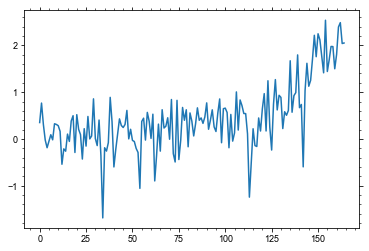

In [30]:
pl.plot(delta_F['historical']['CanESM5']['r11i1p1f1'])

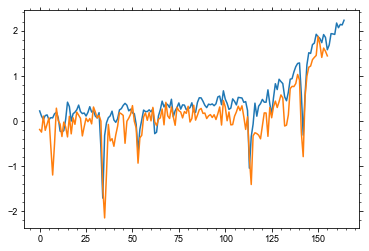

In [31]:
pl.plot(delta_F['historical']['CanESM5']['mean'])
pl.plot(delta_F['historical-cmip5']['CanESM5']['mean'])

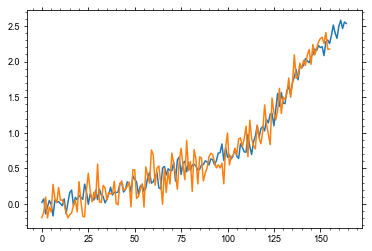

In [32]:
pl.plot(delta_F['hist-GHG']['CanESM5']['mean'])
pl.plot(delta_F['hist-GHG-cmip5']['CanESM5']['mean'])

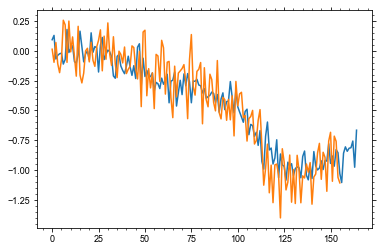

In [33]:
pl.plot(delta_F['hist-aer']['CanESM5']['mean'])
pl.plot(delta_F['hist-aer-cmip5']['CanESM5']['mean'])

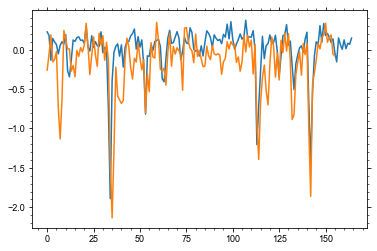

In [34]:
pl.plot(delta_F['hist-nat']['CanESM5']['mean'])
pl.plot(delta_F['hist-nat-cmip5']['CanESM5']['mean'])

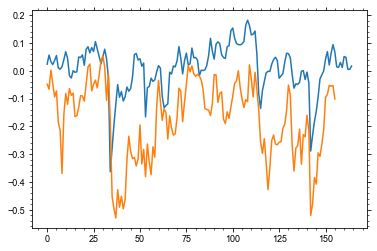

In [35]:
pl.plot(delta_T['hist-nat']['CanESM5']['mean'])
pl.plot(delta_T['hist-nat-cmip5']['CanESM5']['mean'])

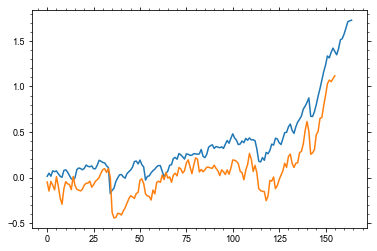

In [36]:
pl.plot(delta_T['historical']['CanESM5']['mean'])
pl.plot(delta_T['historical-cmip5']['CanESM5']['mean'])

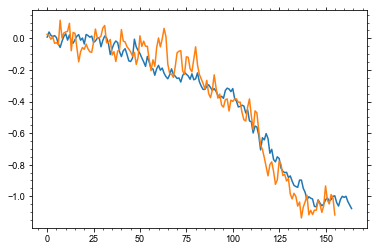

In [37]:
pl.plot(delta_T['hist-aer']['CanESM5']['mean'])
pl.plot(delta_T['hist-aer-cmip5']['CanESM5']['mean'])

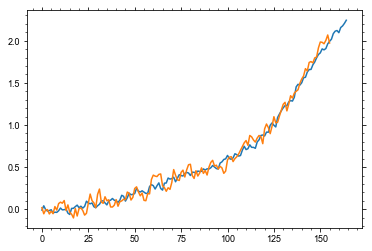

In [38]:
pl.plot(delta_T['hist-GHG']['CanESM5']['mean'])
pl.plot(delta_T['hist-GHG-cmip5']['CanESM5']['mean'])

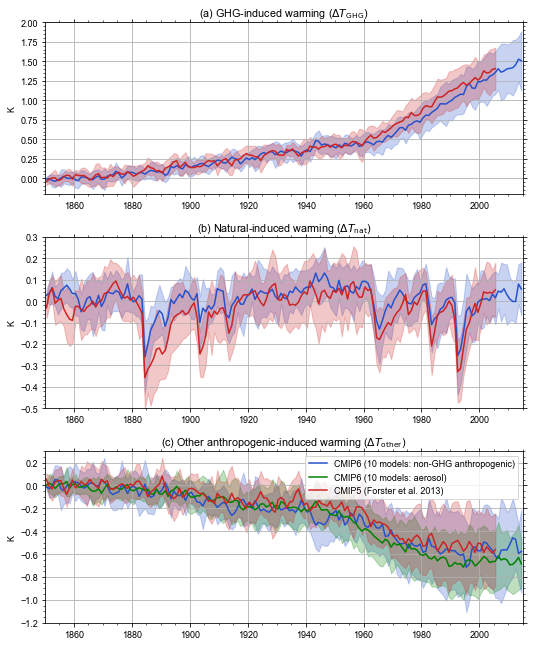

In [39]:
fig, ax = pl.subplots(3,1,figsize=(19/2.54, 23/2.54))

ax[0].fill_between(np.arange(1850.5,2015), np.mean(delta_T_cmip6_consolidated['hist-GHG'], axis=1)-np.std(delta_T_cmip6_consolidated['hist-GHG'], axis=1), np.mean(delta_T_cmip6_consolidated['hist-GHG'], axis=1)+np.std(delta_T_cmip6_consolidated['hist-GHG'], axis=1), color=colors['cmip6'], alpha=0.25)
ax[0].plot(np.arange(1850.5,2015), np.mean(delta_T_cmip6_consolidated['hist-GHG'], axis=1), label='CMIP6 (26 models and counting)', color=colors['cmip6'])
ax[0].fill_between(np.arange(1850.5,2006), np.nanmean(delta_T_cmip5_consolidated['historicalGHG'], axis=1)-np.nanstd(delta_T_cmip5_consolidated['historicalGHG'], axis=1), np.nanmean(delta_T_cmip5_consolidated['historicalGHG'], axis=1)+np.nanstd(delta_T_cmip5_consolidated['historicalGHG'], axis=1), color=colors['cmip5'], alpha=0.25)
ax[0].plot(np.arange(1850.5,2006), np.nanmean(delta_T_cmip5_consolidated['historicalGHG'], axis=1), label='CMIP5 (Forster et al. 2013)', color=colors['cmip5'])
ax[0].set_title('(a) GHG-induced warming ($\Delta T_{\mathrm{GHG}}$)')
ax[0].set_ylabel('K')
ax[0].grid()
#ax[0].legend()
ax[0].set_xlim(1850,2015)
ax[0].set_ylim(-0.2, 2)

ax[1].fill_between(np.arange(1850.5,2015), np.mean(delta_T_cmip6_consolidated['hist-nat'], axis=1)-np.std(delta_T_cmip6_consolidated['hist-nat'], axis=1), np.mean(delta_T_cmip6_consolidated['hist-nat'], axis=1)+np.std(delta_T_cmip6_consolidated['hist-nat'], axis=1), color=colors['cmip6'], alpha=0.25)
ax[1].plot(np.arange(1850.5,2015), np.mean(delta_T_cmip6_consolidated['hist-nat'], axis=1), label='CMIP6 (25 models and counting)', color=colors['cmip6'])
ax[1].fill_between(np.arange(1850.5,2006), np.nanmean(delta_T_cmip5_consolidated['historicalNat'], axis=1)-np.nanstd(delta_T_cmip5_consolidated['historicalNat'], axis=1), np.nanmean(delta_T_cmip5_consolidated['historicalNat'], axis=1)+np.nanstd(delta_T_cmip5_consolidated['historicalNat'], axis=1), color=colors['cmip5'], alpha=0.25)
ax[1].plot(np.arange(1850.5,2006), np.nanmean(delta_T_cmip5_consolidated['historicalNat'], axis=1), label='CMIP5 (Forster et al. 2013)', color=colors['cmip5'])
ax[1].set_title('(b) Natural-induced warming ($\Delta T_{\mathrm{nat}}$)')
ax[1].set_ylabel('K')
ax[1].grid()
#pl.legend()
ax[1].set_xlim(1850,2015)
ax[1].set_ylim(-0.5, 0.3)

ax[2].fill_between(np.arange(1850.5,2015), np.mean(delta_T_cmip6_consolidated['hist-otheranthro'], axis=1)-np.std(delta_T_cmip6_consolidated['hist-otheranthro'], axis=1), np.mean(delta_T_cmip6_consolidated['hist-otheranthro'], axis=1)+np.std(delta_T_cmip6_consolidated['hist-otheranthro'], axis=1), color=colors['cmip6'], alpha=0.25)
ax[2].plot(np.arange(1850.5,2015), np.mean(delta_T_cmip6_consolidated['hist-otheranthro'], axis=1), label='CMIP6 (10 models: non-GHG anthropogenic)', color=colors['cmip6'])
ax[2].fill_between(np.arange(1850.5,2015), np.mean(delta_T_cmip6_consolidated['hist-aer'], axis=1)-np.std(delta_T_cmip6_consolidated['hist-aer'], axis=1), np.mean(delta_T_cmip6_consolidated['hist-aer'], axis=1)+np.std(delta_T_cmip6_consolidated['hist-aer'], axis=1), color='green', alpha=0.25)
ax[2].plot(np.arange(1850.5,2015), np.mean(delta_T_cmip6_consolidated['hist-aer'], axis=1), label='CMIP6 (10 models: aerosol)', color='green')
ax[2].fill_between(np.arange(1850.5,2006), np.nanmean(delta_T_cmip5_consolidated['historicalOther'], axis=1)-np.nanstd(delta_T_cmip5_consolidated['historicalOther'], axis=1), np.nanmean(delta_T_cmip5_consolidated['historicalOther'], axis=1)+np.nanstd(delta_T_cmip5_consolidated['historicalOther'], axis=1), color=colors['cmip5'], alpha=0.25)
ax[2].plot(np.arange(1850.5,2006), np.nanmean(delta_T_cmip5_consolidated['historicalOther'], axis=1), label='CMIP5 (Forster et al. 2013)', color=colors['cmip5'])
ax[2].set_title('(c) Other anthropogenic-induced warming ($\Delta T_{\mathrm{other}}$)')
ax[2].set_ylabel('K')
ax[2].grid()
ax[2].legend()
ax[2].set_xlim(1850,2015)
ax[2].set_ylim(-1.2,0.3)

fig.tight_layout()

In [40]:
lambda5

{'ACCESS1-0': -0.7644476979921265,
 'ACCESS1-3': -0.8110217383134173,
 'BNU-ESM': -0.9211559966146828,
 'CCSM4': -1.1820829220391467,
 'CNRM-CM5': -1.1349638210557922,
 'CSIRO-Mk3-6-0': -0.6353956206882213,
 'CanESM2': -1.029961125345413,
 'FGOALS-g2': -0.8425276820352993,
 'FGOALS-s2': -0.9127881346732851,
 'GFDL-CM3': -0.7617352650385278,
 'GFDL-ESM2G': -1.234151532437787,
 'GFDL-ESM2M': -1.3744649793675574,
 'GISS-E2-H': -1.6571675198826161,
 'GISS-E2-R': -1.7619718696952207,
 'HadGEM2-ES': -0.6324032480482893,
 'IPSL-CM5A-LR': -0.7501170521851918,
 'IPSL-CM5A-MR': -0.8041269719441159,
 'IPSL-CM5B-LR': -1.017461702525837,
 'MIROC-ESM': -0.9245729394174165,
 'MIROC5': -1.5305880167477701,
 'MPI-ESM-LR': -1.1305950894544021,
 'MPI-ESM-MR': -1.191732346312817,
 'MPI-ESM-P': -1.2340486685349235,
 'MRI-CGCM3': -1.2250496331159646,
 'NorESM1-M': -1.100311088371418,
 'NorESM1-ME': -1.0957216860827579,
 'bcc-csm1-1': -1.1515811985029067,
 'bcc-csm1-1-m': -1.1868474726636082,
 'inmcm4': -1.4

In [41]:
delta_F['hist-aer-cmip5']['CanESM5']

{'r1i1p1f1': array([ 3.12992344e-01,  8.26455918e-02,  3.19089772e-01, -1.45089984e-01,
        -2.36010260e-01,  3.30953278e-01, -4.78256030e-02,  6.62632636e-02,
        -9.60201149e-02,  1.31738653e-01, -2.56955635e-01,  7.79197076e-01,
        -7.94518717e-01, -1.66191133e-01, -1.14670449e-02, -2.88782309e-01,
        -7.39262148e-01,  8.59845311e-02,  2.88930494e-01,  1.16780204e-01,
        -3.00041098e-01,  5.04325394e-01, -9.86032898e-02,  2.33665023e-01,
        -1.70299816e-01,  1.31839197e-02,  1.74404268e-01, -7.41085571e-02,
        -2.34790336e-01, -5.27091431e-01,  6.46906160e-01, -4.74200561e-02,
        -6.39572704e-01,  3.17067528e-01, -5.49225976e-02, -6.76449276e-01,
        -6.29695196e-01,  1.50007391e-01,  4.54392592e-01, -2.38274474e-01,
        -1.30371016e-01,  4.59804959e-01, -2.24472461e-01,  1.17624092e-01,
         3.20603813e-01, -4.27181437e-01, -4.12301215e-01,  2.41484385e-01,
         1.15909782e-01, -1.19005407e-02, -4.18576591e-02, -1.00588202e+00,


In [42]:
nmodels = {}
nmodels['CMIP5'] = {}
for expt in ['historical','historicalGHG','historicalNat','historicalOther']:
    count = 0
    for row in delta_F_cmip5_consolidated[expt].T:
        count = count + (1-np.all(np.isnan(row)))
    nmodels['CMIP5'][expt]=count
nmodels['CMIP6'] = {}
for expt in ['historical','hist-GHG','hist-nat','hist-aer','hist-otheranthro']:
    count = 0
    for row in delta_F_cmip6_consolidated[expt].T:
        count = count + (1-np.all(np.isnan(row)))
    nmodels['CMIP6'][expt]=count

In [43]:
nmodels

{'CMIP5': {'historical': 27,
  'historicalGHG': 13,
  'historicalNat': 13,
  'historicalOther': 13},
 'CMIP6': {'historical': 34,
  'hist-GHG': 13,
  'hist-nat': 13,
  'hist-aer': 13,
  'hist-otheranthro': 13}}

In [44]:
goodmodels = {}
sens = {}
goodmodels['CMIP5'] = {}
sens['CMIP5'] = {}
for expt in ['historical','historicalGHG','historicalNat','historicalOther']:
    goodlist = []
    senslist = []
    for model in delta_F_cmip5[expt]:
        if not (np.all(np.isnan(delta_F_cmip5[expt][model]['mean']))):
            goodlist.append(model)
            senslist.append(-1 / lambda5[model])
    goodmodels['CMIP5'][expt]=goodlist
    sens['CMIP5'][expt] = np.array(senslist)
goodmodels['CMIP6'] = {}
sens['CMIP6'] = {}
for expt in ['historical','hist-GHG','hist-nat','hist-aer','hist-otheranthro']:
    goodlist = []
    senslist = []
    for model in delta_F[expt]:
        if not (np.all(np.isnan(delta_F[expt][model]['mean']))):
            goodlist.append(model)
            senslist.append(-1 / lambda6[model])
    goodmodels['CMIP6'][expt]=goodlist
    sens['CMIP6'][expt] = np.array(senslist)

In [45]:
for expt in ['historical','hist-GHG','hist-nat','hist-aer','hist-otheranthro']:
    print(expt, sens['CMIP6'][expt].mean(), sens['CMIP6'][expt].std())
for expt in ['historical','historicalGHG','historicalNat','historicalOther']:
    print(expt, sens['CMIP5'][expt].mean(), sens['CMIP5'][expt].std())

historical 1.112743350451321 0.3723990461886321
hist-GHG 1.1273436837014819 0.35343382251294897
hist-nat 1.1273436837014819 0.35343382251294897
hist-aer 1.1273436837014819 0.35343382251294897
hist-otheranthro 1.1273436837014819 0.35343382251294897
historical 0.9899412571044598 0.2708060836859947
historicalGHG 1.0174327205167926 0.3248121089703315
historicalNat 1.0174327205167926 0.3248121089703315
historicalOther 1.0174327205167926 0.3248121089703315


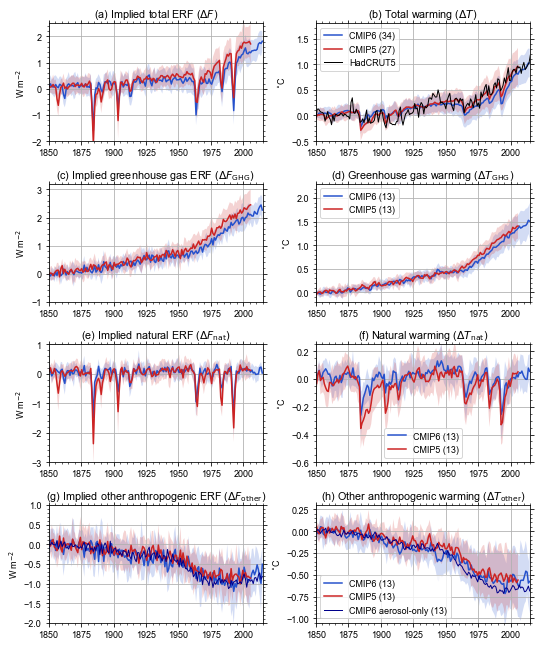

In [46]:
fig, ax = pl.subplots(4,2,figsize=(19/2.54, 23/2.54))

cmip5_names = {
    'historical': 'historical',
    'hist-GHG': 'historicalGHG',
    'hist-nat': 'historicalNat',
    'hist-otheranthro': 'historicalOther',
}

legend_pos = {
    'historical': 'upper left',
    'hist-GHG': 'upper left',
    'hist-nat': 'lower center',
    'hist-otheranthro': 'lower left'
}

for i, expt in enumerate(['historical', 'hist-GHG','hist-nat','hist-otheranthro']):
    ax[i,0].fill_between(
        np.arange(1850.5,2015), 
        np.mean(delta_F_cmip6_consolidated[expt], axis=1)-np.std(delta_F_cmip6_consolidated[expt], axis=1),
        np.mean(delta_F_cmip6_consolidated[expt], axis=1)+np.std(delta_F_cmip6_consolidated[expt], axis=1),
        color=colors['cmip6'],
        alpha=0.2,
        edgecolor=None
    )
    ax[i,0].plot(
        np.arange(1850.5,2015),
        np.mean(delta_F_cmip6_consolidated[expt], axis=1),
        label='CMIP6 (%d)' % (nmodels['CMIP6'][expt]),
        color=colors['cmip6']
    )
    ax[i,0].fill_between(
        np.arange(1850.5,2006),
        np.nanmean(delta_F_cmip5_consolidated[cmip5_names[expt]], axis=1)-np.nanstd(delta_F_cmip5_consolidated[cmip5_names[expt]], axis=1),
        np.nanmean(delta_F_cmip5_consolidated[cmip5_names[expt]], axis=1)+np.nanstd(delta_F_cmip5_consolidated[cmip5_names[expt]], axis=1),
        color=colors['cmip5'],
        alpha=0.2,
        edgecolor=None
    )
    ax[i,0].plot(
        np.arange(1850.5,2006),
        np.nanmean(delta_F_cmip5_consolidated[cmip5_names[expt]], axis=1),
        label='CMIP5',
        color=colors['cmip5']
    )
    if i==3:
        ax[3,0].plot(np.arange(1850.5,2015), np.mean(delta_F_cmip6_consolidated['hist-aer'], axis=1), color='darkblue', lw=1.0)
    ax[i,0].set_ylabel('W m$^{-2}$')
    ax[i,0].grid()
    ax[i,0].set_title(expt)
    ax[i,0].set_xlim(1850, 2015)
    #ax[row,col].set_ylim(-2, 3)

    ax[i,1].fill_between(
        np.arange(1850.5,2015), 
        np.mean(delta_T_cmip6_consolidated[expt], axis=1)-np.std(delta_T_cmip6_consolidated[expt], axis=1),
        np.mean(delta_T_cmip6_consolidated[expt], axis=1)+np.std(delta_T_cmip6_consolidated[expt], axis=1),
        color=colors['cmip6'],
        alpha=0.2,
        edgecolor=None
    )
    ax[i,1].plot(
        np.arange(1850.5,2015),
        np.mean(delta_T_cmip6_consolidated[expt], axis=1),
        label='CMIP6 (%d)' % (nmodels['CMIP6'][expt]),
        color=colors['cmip6']
    )
    ax[i,1].fill_between(
        np.arange(1850.5,2006),
        np.nanmean(delta_T_cmip5_consolidated[cmip5_names[expt]], axis=1)-np.nanstd(delta_T_cmip5_consolidated[cmip5_names[expt]], axis=1),
        np.nanmean(delta_T_cmip5_consolidated[cmip5_names[expt]], axis=1)+np.nanstd(delta_T_cmip5_consolidated[cmip5_names[expt]], axis=1),
        color=colors['cmip5'],
        alpha=0.2,
        edgecolor=None
    )
    ax[i,1].plot(
        np.arange(1850.5,2006),
        np.nanmean(delta_T_cmip5_consolidated[cmip5_names[expt]], axis=1),
        label='CMIP5 (%d)' % (nmodels['CMIP5'][cmip5_names[expt]]),
        color=colors['cmip5']
    )
    if i==0:
        ax[0,1].plot(
            hadcrut5.loc[:2020, 'Anomaly (deg C)'] - hadcrut5.loc[1850:1900,'Anomaly (deg C)'].mean(),
            color='k', 
            label='HadCRUT5',
            lw=1.0
        )
    if i==3:
        ax[3,1].plot(
            np.arange(1850.5,2015),
            np.mean(delta_T_cmip6_consolidated['hist-aer'], axis=1),
            label='CMIP6 aerosol-only (%d)' % (nmodels['CMIP6']['hist-aer']),
            color='darkblue',
            lw=1.0,
        )

    ax[i,1].set_ylabel('$^{\circ}$C')
    ax[i,1].grid()
    ax[i,1].set_title(expt)
    ax[i,1].set_xlim(1850, 2015)
    ax[i,1].legend(loc=legend_pos[expt])

ax[0,0].set_ylim(-2,2.5)
ax[0,1].set_ylim(-0.5,1.8)
ax[1,0].set_ylim(-1,3.2)
ax[1,1].set_ylim(-0.2,2.3)
ax[2,0].set_ylim(-3,1)
ax[2,1].set_ylim(-0.6,0.25)
ax[3,0].set_ylim(-2,1)
ax[3,1].set_ylim(-1.05,0.3)

ax[0,0].set_title('(a) Implied total ERF ($\Delta F$)')
ax[1,0].set_title('(c) Implied greenhouse gas ERF ($\Delta F_{\mathrm{GHG}}$)')
ax[2,0].set_title('(e) Implied natural ERF ($\Delta F_{\mathrm{nat}}$)')
ax[3,0].set_title('(g) Implied other anthropogenic ERF ($\Delta F_{\mathrm{other}}$)')
ax[0,1].set_title('(b) Total warming ($\Delta T$)')
ax[1,1].set_title('(d) Greenhouse gas warming ($\Delta T_{\mathrm{GHG}}$)')
ax[2,1].set_title('(f) Natural warming ($\Delta T_{\mathrm{nat}}$)')
ax[3,1].set_title('(h) Other anthropogenic warming ($\Delta T_{\mathrm{other}}$)')
fig.tight_layout()
pl.savefig('../plots/fig2.pdf')

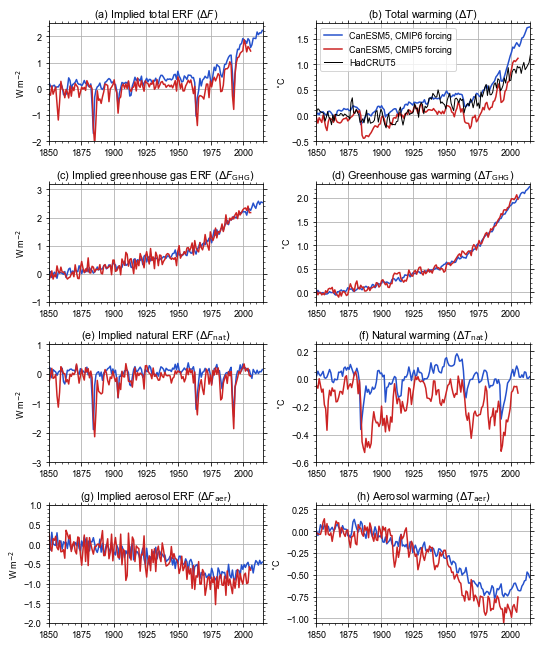

In [47]:
fig, ax = pl.subplots(4,2,figsize=(19/2.54, 23/2.54))

for i, expt in enumerate(['historical', 'hist-GHG','hist-nat','hist-otheranthro']):
    ax[i,0].plot(
        np.arange(1850.5,2015),
        delta_F[expt]['CanESM5']['mean'],
        label='CMIP6 (%d)' % (nmodels['CMIP6'][expt]),
        color=colors['cmip6']
    )
    ax[i,0].plot(
        np.arange(1850.5,2006),
        delta_F[expt + '-cmip5']['CanESM5']['mean'],
        label='CMIP5',
        color=colors['cmip5']
    )
    ax[i,0].set_ylabel('W m$^{-2}$')
    ax[i,0].grid()
    ax[i,0].set_title(expt)
    ax[i,0].set_xlim(1850, 2015)
    #ax[row,col].set_ylim(-2, 3)

    if i==0:
        label = 'CanESM5, CMIP6 forcing'
    else:
        label = ''
    ax[i,1].plot(
        np.arange(1850.5,2015),
        delta_T[expt]['CanESM5']['mean'],
        label=label,
        color=colors['cmip6']
    )
    if i==0:
        label = 'CanESM5, CMIP5 forcing'
    else:
        label = ''
    ax[i,1].plot(
        np.arange(1850.5,2006),
        delta_T[expt + '-cmip5']['CanESM5']['mean'],
        label=label,
        color=colors['cmip5']
    )
    if i==0:
        ax[0,1].plot(
            hadcrut5.loc[:2020, 'Anomaly (deg C)'] - hadcrut5.loc[1850:1900,'Anomaly (deg C)'].mean(),
            color='k', 
            label='HadCRUT5',
            lw=1.0
        )
        ax[i,1].legend()

    ax[i,1].set_ylabel('$^{\circ}$C')
    ax[i,1].grid()
    ax[i,1].set_title(expt)
    ax[i,1].set_xlim(1850, 2015)


ax[0,0].set_ylim(-2,2.5)
ax[0,1].set_ylim(-0.5,1.8)
ax[1,0].set_ylim(-1,3.2)
ax[1,1].set_ylim(-0.2,2.3)
ax[2,0].set_ylim(-3,1)
ax[2,1].set_ylim(-0.6,0.25)
ax[3,0].set_ylim(-2,1)
ax[3,1].set_ylim(-1.05,0.3)

ax[0,0].set_title('(a) Implied total ERF ($\Delta F$)')
ax[1,0].set_title('(c) Implied greenhouse gas ERF ($\Delta F_{\mathrm{GHG}}$)')
ax[2,0].set_title('(e) Implied natural ERF ($\Delta F_{\mathrm{nat}}$)')
ax[3,0].set_title('(g) Implied aerosol ERF ($\Delta F_{\mathrm{aer}}$)')
ax[0,1].set_title('(b) Total warming ($\Delta T$)')
ax[1,1].set_title('(d) Greenhouse gas warming ($\Delta T_{\mathrm{GHG}}$)')
ax[2,1].set_title('(f) Natural warming ($\Delta T_{\mathrm{nat}}$)')
ax[3,1].set_title('(h) Aerosol warming ($\Delta T_{\mathrm{aer}}$)')
fig.tight_layout()
pl.savefig('../plots/fig3.pdf')

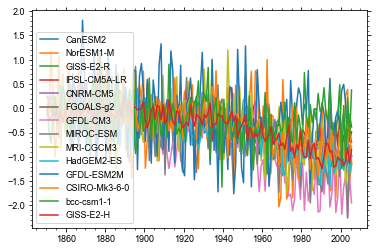

In [48]:
for model in delta_F_cmip5['historicalOther']:
    pl.plot(np.arange(1850.5,2006), delta_F_cmip5['historicalOther'][model]['mean'], label=model)
pl.legend()

In [49]:
np.nanmean(delta_T_cmip5_consolidated['historical'], axis=1)[:51].mean()

-0.011715409716919568

In [50]:
np.nanmean(delta_T_cmip6_consolidated['historical'], axis=1)[:51].mean()

0.03114876256793769

In [51]:
np.mean(np.mean(delta_T_cmip6_consolidated['hist-aer'][145:156,:], axis=0))

-0.6605920485790997

In [52]:
np.std(np.mean(delta_T_cmip6_consolidated['hist-aer'][145:156,:], axis=0))

0.26547328992460684

In [53]:
for expt in ['historical', 'hist-GHG','hist-nat','hist-otheranthro','hist-aer']:
    print('%16s & $%.2f \pm %.2f$ & $%.2f \pm %.2f$ & $%.2f$' % 
        (
            expt,
            np.mean(np.mean(delta_F_cmip6_consolidated[expt][145:156,:], axis=0)),
            np.std(np.mean(delta_F_cmip6_consolidated[expt][145:156,:], axis=0)),
            np.mean(np.mean(delta_T_cmip6_consolidated[expt][145:156,:], axis=0)),
            np.std(np.mean(delta_T_cmip6_consolidated[expt][145:156,:], axis=0)),
            np.mean(np.mean(delta_T_cmip6_consolidated[expt][145:156,:], axis=0)) / np.mean(np.mean(delta_F_cmip6_consolidated[expt][145:156,:], axis=0))
        )
    )

      historical & $1.32 \pm 0.38$ & $0.67 \pm 0.24$ & $0.50$
        hist-GHG & $1.98 \pm 0.27$ & $1.24 \pm 0.26$ & $0.63$
        hist-nat & $0.12 \pm 0.12$ & $-0.01 \pm 0.09$ & $-0.09$
hist-otheranthro & $-0.82 \pm 0.37$ & $-0.58 \pm 0.31$ & $0.70$
        hist-aer & $-0.93 \pm 0.31$ & $-0.66 \pm 0.27$ & $0.71$


In [54]:
for expt in ['historical', 'historicalGHG','historicalNat','historicalOther']:
    print('$%.2f \pm %.2f$ & $%.2f \pm %.2f$ & $%.2f$ \\\\' % 
        (
            np.nanmean(np.nanmean(delta_F_cmip5_consolidated[expt][145:156,:], axis=0)),
            np.nanstd(np.nanmean(delta_F_cmip5_consolidated[expt][145:156,:], axis=0)),
            np.nanmean(np.nanmean(delta_T_cmip5_consolidated[expt][145:156,:], axis=0)),
            np.nanstd(np.nanmean(delta_T_cmip5_consolidated[expt][145:156,:], axis=0)),
            np.nanmean(np.nanmean(delta_T_cmip5_consolidated[expt][145:156,:], axis=0)) / np.nanmean(np.nanmean(delta_F_cmip5_consolidated[expt][145:156,:], axis=0))
        )
    )

$1.67 \pm 0.57$ & $0.80 \pm 0.32$ & $0.48$ \\
$2.28 \pm 0.46$ & $1.31 \pm 0.24$ & $0.57$ \\
$0.15 \pm 0.15$ & $-0.01 \pm 0.10$ & $-0.09$ \\
$-0.83 \pm 0.36$ & $-0.55 \pm 0.31$ & $0.66$ \\


<ipython-input-54-d8cf5a304dfe>:4: RuntimeWarning: Mean of empty slice
  np.nanmean(np.nanmean(delta_F_cmip5_consolidated[expt][145:156,:], axis=0)),
<ipython-input-54-d8cf5a304dfe>:5: RuntimeWarning: Mean of empty slice
  np.nanstd(np.nanmean(delta_F_cmip5_consolidated[expt][145:156,:], axis=0)),
<ipython-input-54-d8cf5a304dfe>:6: RuntimeWarning: Mean of empty slice
  np.nanmean(np.nanmean(delta_T_cmip5_consolidated[expt][145:156,:], axis=0)),
<ipython-input-54-d8cf5a304dfe>:7: RuntimeWarning: Mean of empty slice
  np.nanstd(np.nanmean(delta_T_cmip5_consolidated[expt][145:156,:], axis=0)),
<ipython-input-54-d8cf5a304dfe>:8: RuntimeWarning: Mean of empty slice
  np.nanmean(np.nanmean(delta_T_cmip5_consolidated[expt][145:156,:], axis=0)) / np.nanmean(np.nanmean(delta_F_cmip5_consolidated[expt][145:156,:], axis=0))


In [55]:
delta_T_cmip6_consolidated['hist-nat'].mean(axis=1)[145:156]

array([-0.04860543, -0.02713049, -0.06843661, -0.05550289, -0.00430644,
        0.00641444,  0.00904092,  0.01150949,  0.00237894,  0.03232128,
        0.0151892 ])

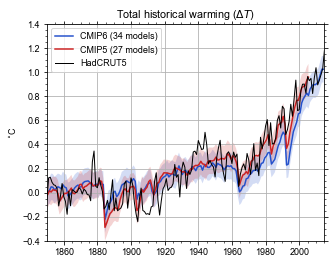

In [56]:
fig, ax = pl.subplots(figsize=(12/2.54, 9.5/2.54))

expt = 'historical'

ax.fill_between(
    np.arange(1850.5,2015), 
#    np.mean(delta_T_cmip6_consolidated[expt], axis=1)-np.std(delta_T_cmip6_consolidated[expt], axis=1),
#    np.mean(delta_T_cmip6_consolidated[expt], axis=1)+np.std(delta_T_cmip6_consolidated[expt], axis=1),
    np.mean(delta_T_cmip6_consolidated[expt], axis=1)-0.11,
    np.mean(delta_T_cmip6_consolidated[expt], axis=1)+0.11,
    color=colors['cmip6'],
    alpha=0.2,
    edgecolor=None
)
ax.plot(
    np.arange(1850.5,2015),
    np.mean(delta_T_cmip6_consolidated[expt], axis=1),
    label='CMIP6 (%d models)' % (nmodels['CMIP6'][expt]),
    color=colors['cmip6']
)
ax.fill_between(
    np.arange(1850.5,2006),
    #np.nanmean(delta_T_cmip5_consolidated[cmip5_names[expt]], axis=1)-np.nanstd(delta_T_cmip5_consolidated[cmip5_names[expt]], axis=1),
    #np.nanmean(delta_T_cmip5_consolidated[cmip5_names[expt]], axis=1)+np.nanstd(delta_T_cmip5_consolidated[cmip5_names[expt]], axis=1),
    np.nanmean(delta_T_cmip5_consolidated[cmip5_names[expt]], axis=1)-0.11,
    np.nanmean(delta_T_cmip5_consolidated[cmip5_names[expt]], axis=1)+0.11,
    color=colors['cmip5'],
    alpha=0.2,
    edgecolor=None
)
ax.plot(
    np.arange(1850.5,2006),
    np.nanmean(delta_T_cmip5_consolidated[cmip5_names[expt]], axis=1),
    label='CMIP5 (%d models)' % (nmodels['CMIP5'][cmip5_names[expt]]),
    color=colors['cmip5']
)

ax.plot(
    hadcrut5.loc[:2020, 'Anomaly (deg C)'] - hadcrut5.loc[1850:1900,'Anomaly (deg C)'].mean(),
    color='k', 
    label='HadCRUT5',
    lw=1.0
)

ax.set_ylabel('$^{\circ}$C')
ax.grid()
ax.set_xlim(1850, 2015)
ax.legend()
ax.set_ylim(-0.4,1.4)

ax.set_title('Total historical warming ($\Delta T$)')

fig.tight_layout()
pl.savefig('../plots/fig0.pdf')

In [57]:
for i, expt in enumerate(['historical-cmip5', 'hist-GHG-cmip5','hist-nat-cmip5','hist-otheranthro-cmip5']):
    print(delta_F[expt]['CanESM5'].keys())

dict_keys(['r1i1p1f1', 'r3i1p1f1', 'r4i1p1f1', 'r5i1p1f1', 'r2i1p1f1', 'mean'])
dict_keys(['r1i1p1f1', 'r3i1p1f1', 'r4i1p1f1', 'r5i1p1f1', 'r2i1p1f1', 'mean'])
dict_keys(['r1i1p1f1', 'r3i1p1f1', 'r4i1p1f1', 'r5i1p1f1', 'r2i1p1f1', 'mean'])
dict_keys(['r1i1p1f1', 'r3i1p1f1', 'r4i1p1f1', 'r5i1p1f1', 'r2i1p1f1', 'mean'])


In [58]:
for expt in ['historical', 'historicalGHG', 'historicalNat']:
    print(expt)
    print('----------')
    for model in delta_T_cmip5[expt].keys():
        for run in delta_T_cmip5[expt][model].keys():
            if run=='mean':
                continue
            print(model, run, np.sum(~np.isnan(delta_T_cmip5[expt][model][run])))
        print()
    print()

historical
----------
MPI-ESM-P r1i1p1 156
MPI-ESM-P r2i1p1 156

CanESM2 r1i1p1 156
CanESM2 r2i1p1 156
CanESM2 r3i1p1 156
CanESM2 r4i1p1 156
CanESM2 r5i1p1 156

IPSL-CM5B-LR r1i1p1 156

inmcm4 r1i1p1 156

ACCESS1-0 r1i1p1 156

FGOALS-s2 r1i1p1 156
FGOALS-s2 r2i1p1 156
FGOALS-s2 r3i1p1 156

NorESM1-M r1i1p1 156
NorESM1-M r2i1p1 156
NorESM1-M r3i1p1 156

GISS-E2-R r1i1p1 156
GISS-E2-R r2i1p1 156
GISS-E2-R r3i1p1 156
GISS-E2-R r4i1p1 156
GISS-E2-R r5i1p1 156
GISS-E2-R r6i1p1 156

IPSL-CM5A-LR r1i1p1 156
IPSL-CM5A-LR r2i1p1 156
IPSL-CM5A-LR r3i1p1 156
IPSL-CM5A-LR r4i1p1 156
IPSL-CM5A-LR r5i1p1 156
IPSL-CM5A-LR r6i1p1 156

CNRM-CM5 r10i1p1 156
CNRM-CM5 r1i1p1 156
CNRM-CM5 r2i1p1 156
CNRM-CM5 r3i1p1 156
CNRM-CM5 r4i1p1 156
CNRM-CM5 r5i1p1 156
CNRM-CM5 r6i1p1 156
CNRM-CM5 r7i1p1 156
CNRM-CM5 r8i1p1 156
CNRM-CM5 r9i1p1 156

FGOALS-g2 r3i1p1 156
FGOALS-g2 r5i1p1 156

GFDL-CM3 r1i1p1 146
GFDL-CM3 r2i1p1 146
GFDL-CM3 r3i1p1 146
GFDL-CM3 r4i1p1 146
GFDL-CM3 r5i1p1 146

MIROC-ESM r1i1p1 156
MIROC-